[('like', 1314), ('feel', 1125), ('know', 723), ('time', 570), ('thing', 489), ('really', 485), ('get', 470), ('feeling', 416), ('one', 396), ('life', 387), ('want', 367), ('would', 365), ('people', 364), ('year', 361), ('think', 360), ('even', 346), ('go', 320), ('going', 308), ('thought', 305), ('something', 288)]
d love friend like dating yah doesnt want around due connection seemingly does
ound due connection seemingly doesnt want head either hi everyone md since thi
problem face every time try quit see want daydream get light feeling chest tho
verything slow motion get frustrated want press fast forward sometimes feel li
ention friend never train asked jump want friendship become whatever plus hone
et irritable talk concentrate saying want shut snap look real either get upset
emale lot negative thing happen life want go great detail want make short hear
ing happen life want go great detail want make short heard people borderline p
 person people inside finally behave want would li

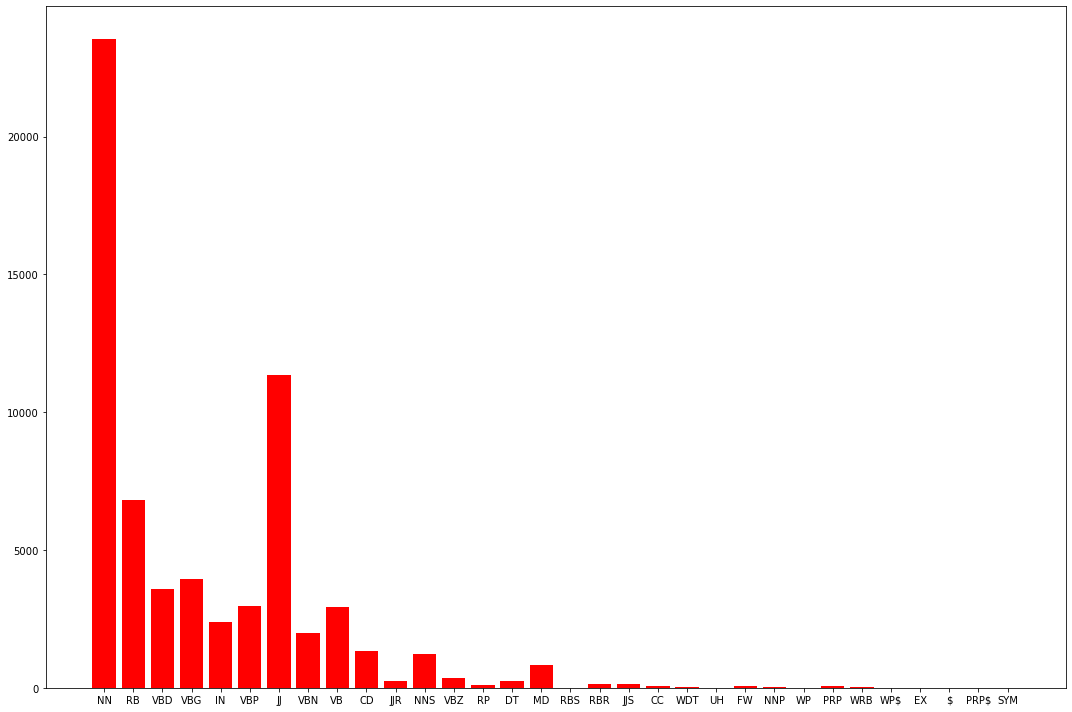

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk import FreqDist

col = ['text']
df_old = pd.read_csv('diss_forum.csv', names=col, header=None)
df = pd.DataFrame({'text': df_old['text'][1:],
                   'label': 5})
df.fillna(value='')



###tokenize title and body texts###
tokenizer = RegexpTokenizer(r'\w+')
df['text'] = df['text'].apply(lambda x: tokenizer.tokenize(x.lower()))



###remove stopwords###

#returns all words that aren't in the list of stopwords
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words
#had to use 'python -m nltk.downloader stopwords' from the TestEnv to make stopwords work
df['text'] = df['text'].apply(lambda x: remove_stopwords(x))


###lemmatizer -- lemmatizer maps common words back to its base###

lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(x) for x in text]
    return lem_text
df['text'] = df['text'].apply(lambda x: word_lemmatizer(x))


###storing title and body columns as a list to feed into pos_tag###
title_list = list(df['text'])



#Text classification: pos tagging
pos_tagged_text = []

for ele in title_list:
    pos_tagged_text.append(nltk.pos_tag(ele))

    
df['pos_tagged_text'] = pos_tagged_text



###The codes below analyzes text frequency distribution, collocation, and concordance while excluding certain words###
single_w = []
exclude_list = ['www', 'beautyafterbruises', 'org', 'com', 'nan']

def exclude(text):
    words = [w for w in text if w not in exclude_list]
    return words
df['text'] = df['text'].apply(lambda x: exclude(x))

for item in df['pos_tagged_text']:
    for tuples in item:
        if tuples[0] not in exclude_list:
            single_w.append(tuples[0])

            
fd = nltk.FreqDist(single_w)
print(fd.most_common(20))


text = nltk.Text(single_w)
concordance_list = text.concordance_list("want", lines=20)
for entry in concordance_list:
    print(entry.line)
finder = nltk.collocations.QuadgramCollocationFinder.from_words(text)
print(finder)
print(finder.ngram_fd.most_common(20))


'''creating a dictionary to store counts of unique POS tags''' 
pos_list = []
for row in df['pos_tagged_text']:
    for tup in row:
        if tup[1] not in pos_list:
            pos_list.append(tup[1])
            
pos_dict = {}
for item in pos_list:
    pos_dict[item] = 0
    for row in df['pos_tagged_text']:
        for tup in row:
            if tup[1] == item:
                pos_dict[item] += 1
                

'''Plotting the counts'''
%matplotlib inline

fig = plt.figure(figsize=(15,10))
plt.bar(pos_dict.keys(), pos_dict.values(), color='red')
plt.tight_layout()
plt.savefig("pos_dist.png", dpi=300)
plt.show()


df_new = pd.DataFrame({'text': df['text'],
                       'label': 5})


df_new.to_csv('diss_forum_clean.csv', index=False)


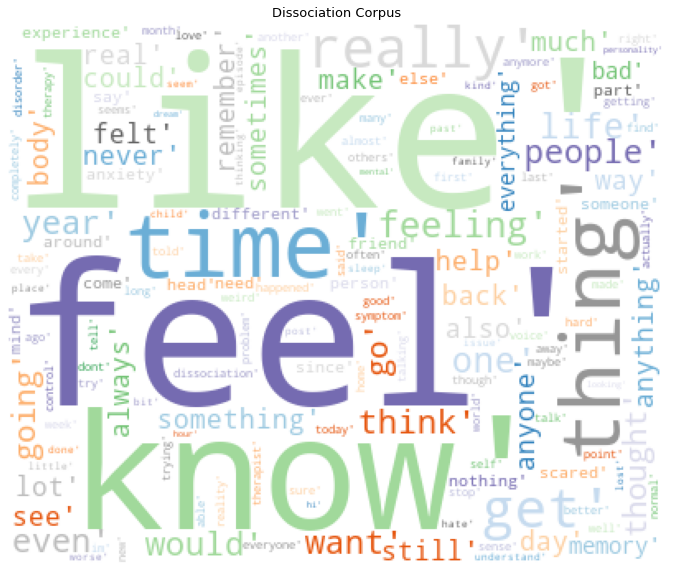

In [8]:
from wordcloud import WordCloud, ImageColorGenerator
'''defining method to generate a WordCloud'''
def generate_wordcloud(data, title):
    cloud = WordCloud(width=400,
                      height=330,
                      max_words=150,
                      colormap='tab20c',
                      stopwords=exclude_list,
                      collocations=False,
                      background_color='white'
                     ).generate_from_text(data)
    plt.figure(figsize=(14,10))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title, fontsize=13)
    plt.savefig("wordcloud.png", dpi=300)
    plt.show()
    
generate_wordcloud(str(single_w), 'Dissociation Corpus')

In [13]:
df.head()

,text,label,pos_tagged_text
1.0,"[hello, recently, started, questioning, osdd, ...",5,"[(hello, NN), (recently, RB), (started, VBD), ..."
2.0,"[hi, lovely, reading, 3, hope, dearly, find, c...",5,"[(hi, NN), (lovely, RB), (reading, VBG), (3, C..."
3.0,"[hi, new, multiple, dissociative, episode, lif...",5,"[(hi, JJ), (new, JJ), (multiple, JJ), (dissoci..."
4.0,"[sort, opposite, feeling, real, felt, majority...",5,"[(sort, NN), (opposite, MD), (feeling, VBG), (..."
5.0,"[little, experience, strange, state, mind, moo...",5,"[(little, JJ), (experience, NN), (strange, JJ)..."


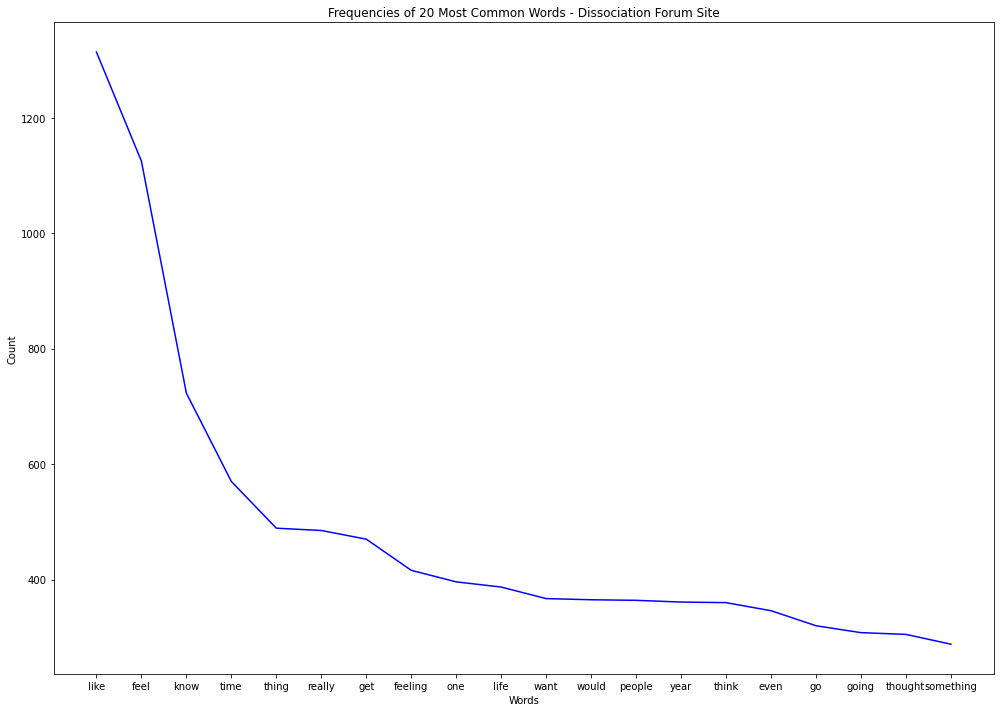

<Figure size 432x288 with 0 Axes>

In [18]:
top_20 = []
w_freq = fd.most_common(20)

freq_dist = dict(w_freq)
fig = plt.figure(figsize=(14,10))
plt.plot(freq_dist.keys(), freq_dist.values(), color='b')
plt.title("Frequencies of 20 Most Common Words - Dissociation Forum Site")
plt.xlabel("Words")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.savefig("forum.png", dpi=300)